In [6]:
## Plotting Libraries 
import matplotlib.pyplot as plt
%matplotlib notebook
%config InlineBackend.print_figure_kwargs = {}
import seaborn as sns
sns.set_style("whitegrid")

import numpy as np
from gurobipy import *

# Single Ponds with Time Horizon

Optimize a model with 599 rows, 400 columns and 1196 nonzeros
Coefficient statistics:
  Matrix range     [3e-02, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+03, 1e+03]
  RHS range        [2e+00, 5e+02]
Presolve removed 380 rows and 161 columns
Presolve time: 0.01s
Presolved: 219 rows, 239 columns, 847 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -2.4763924e+03   1.432174e+02   0.000000e+00      0s
     106    1.5092891e+04   0.000000e+00   0.000000e+00      0s

Solved in 106 iterations and 0.02 seconds
Optimal objective  1.509289071e+04


<IPython.core.display.Javascript object>


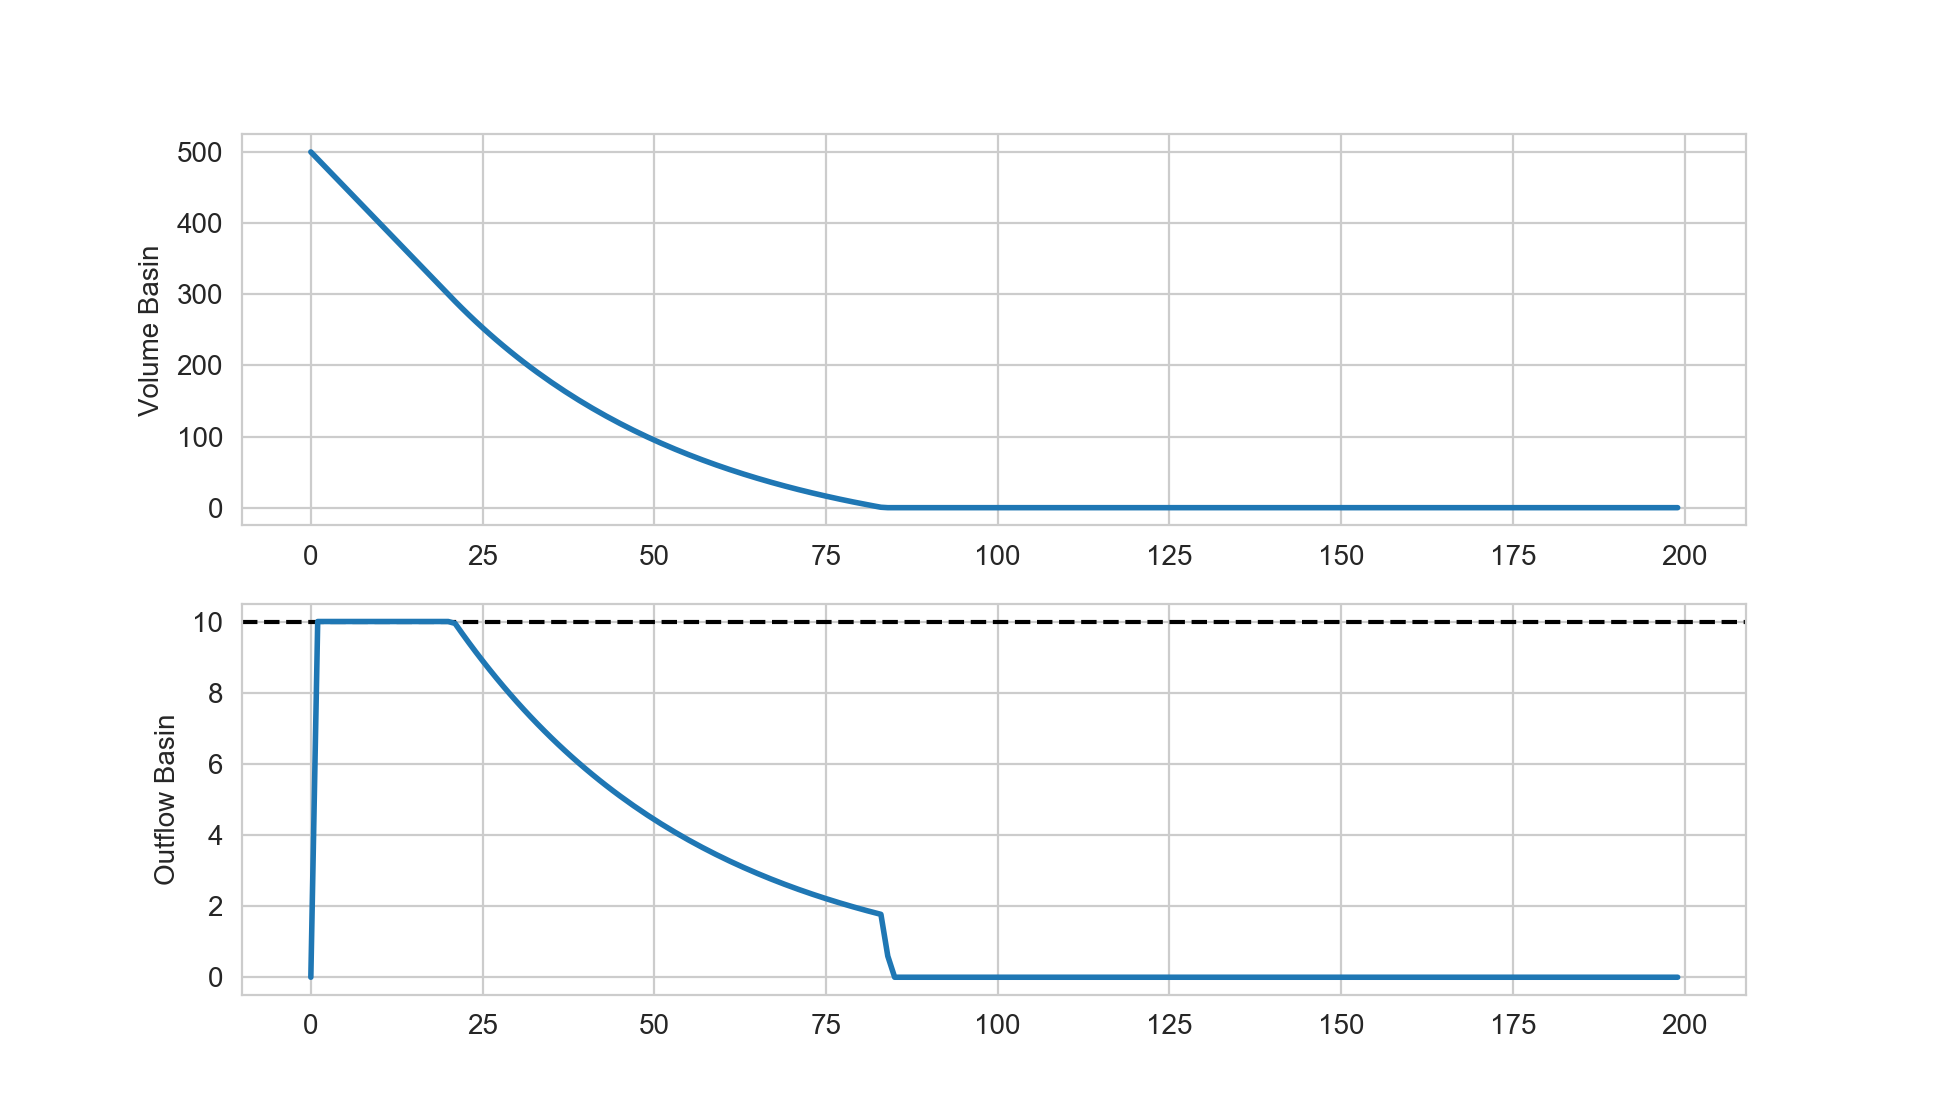

Text(0, 0.5, 'Outflow Basin')

In [13]:
# Create a model 
m = Model("singlepond_horizon")

# Create intial volume 
InitVolume = 500

# Create Variable
horizon = [i for i in range(0,200)]
outflow = m.addVars(horizon, lb=0, vtype=GRB.CONTINUOUS, name="outflows")
volume = m.addVars(horizon, lb=0, ub=1000, vtype=GRB.CONTINUOUS, name="volume")

# Define the constrat for updating volume
m.addConstr(volume[0] == InitVolume, "InitialConditions")
m.addConstrs(volume[time]  == volume[time-1] - outflow[time] for time in horizon[1:])

# Define the constraint for maintaning water under threshold 
m.addConstrs(outflow[time] <= 10 for time in horizon)

# Define the constraint for maintaning water under threshold 
m.addConstrs(outflow[time] <= (volume[time-1]*6.14647148e-02 + 3.81)*0.447 for time in horizon[1:])

m.setObjective(volume.sum(), GRB.MINIMIZE)

m.optimize()

# Parse using regex 
data = {}
data["volume"] = []
data["outflows"] = []

for v in m.getVars():
    temp = re.split('\[|,|\]', v.varName)
    data[temp[0]].append(v.x)

plt.subplot(2, 1, 1)
plt.plot(data["volume"], linewidth=2.0)
plt.ylabel("Volume Basin")

plt.subplot(2, 1, 2)
plt.axhline(y=10, color='k', linestyle='--')
plt.plot(data["outflows"], linewidth=2.0)
plt.ylabel("Outflow Basin")

# Single Ponds (Time Horizon) with inflow

Optimize a model with 2999 rows, 2000 columns and 5996 nonzeros
Coefficient statistics:
  Matrix range     [3e-02, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+03, 1e+03]
  RHS range        [2e+00, 5e+02]
Presolve removed 1132 rows and 83 columns
Presolve time: 0.01s
Presolved: 1867 rows, 1917 columns, 4881 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.1777457e+04   1.296819e+03   0.000000e+00      0s
     958    1.7390272e+05   0.000000e+00   0.000000e+00      0s

Solved in 958 iterations and 0.03 seconds
Optimal objective  1.739027182e+05


<IPython.core.display.Javascript object>


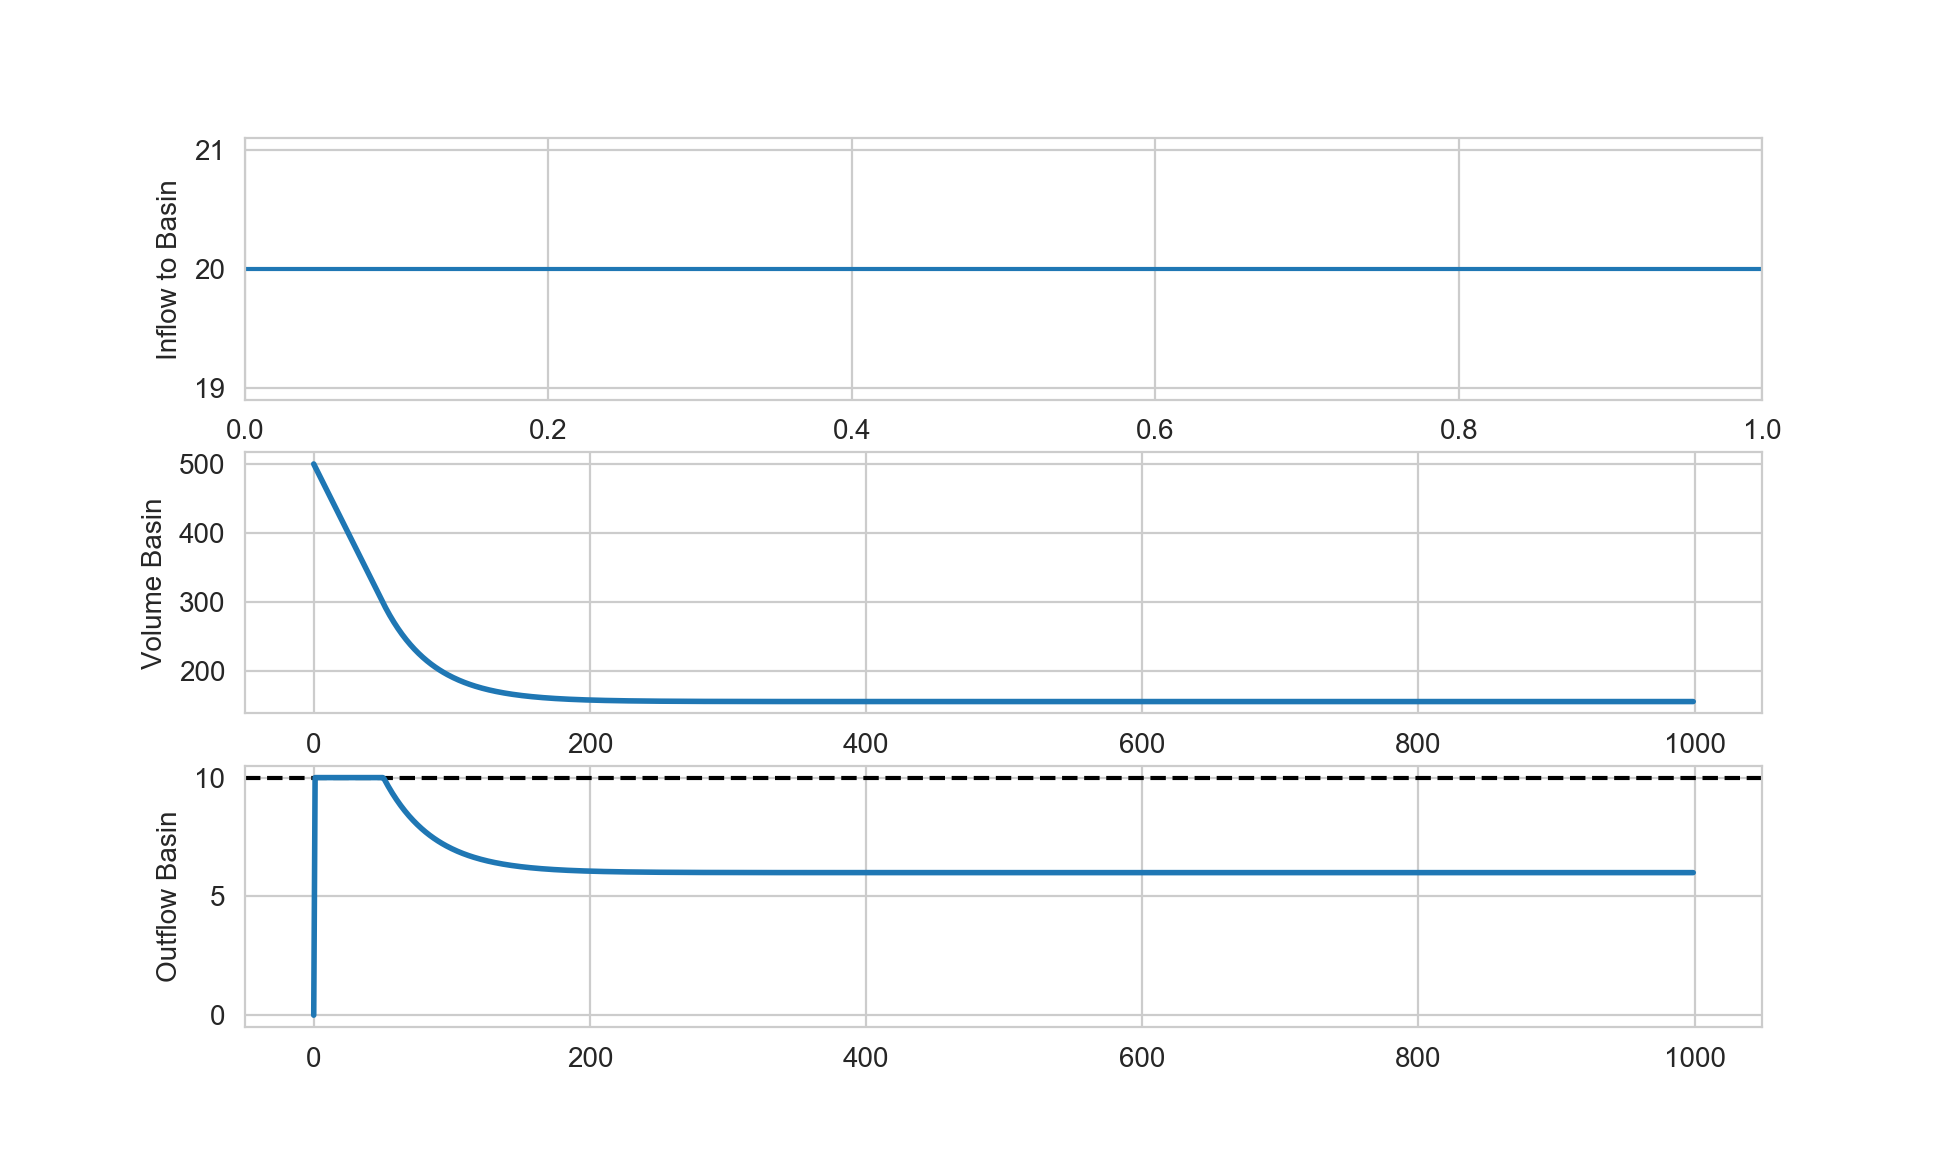

Text(0, 0.5, 'Outflow Basin')

In [16]:
# Create a model 
m = Model("sp_in")

# Create intial volume 
InitVolume = 500
inflow = 20

# Create Variable
horizon = [i for i in range(0,1000)]
outflow = m.addVars(horizon, lb=0, vtype=GRB.CONTINUOUS, name="outflows")
volume = m.addVars(horizon, lb=0, ub=1000, vtype=GRB.CONTINUOUS, name="volume")

# Define the constrat for updating volume
m.addConstr(volume[0] == InitVolume, "InitialConditions")
m.addConstrs(volume[time]  == volume[time-1] - outflow[time] + 6.0 for time in horizon[1:])

# Define the constraint for maintaning water under threshold 
m.addConstrs(outflow[time] <= 10 for time in horizon)

# Define the constraint for maintaning water under threshold 
m.addConstrs(outflow[time] <= (volume[time-1]*6.14647148e-02 + 3.81)*0.447 for time in horizon[1:])

m.setObjective(volume.sum(), GRB.MINIMIZE)
m.optimize()

# Parse using regex 
data = {}
data["volume"] = []
data["outflows"] = []

for v in m.getVars():
    temp = re.split('\[|,|\]', v.varName)
    data[temp[0]].append(v.x)

plt.subplot(3, 1, 1)
plt.axhline(y=20, linestyle='-')
plt.ylabel("Inflow to Basin")

plt.subplot(3, 1, 2)
plt.plot(data["volume"], linewidth=2.0)
plt.ylabel("Volume Basin")

plt.subplot(3, 1, 3)
plt.axhline(y=10, color='k', linestyle='--')
plt.plot(data["outflows"], linewidth=2.0)
plt.ylabel("Outflow Basin")

# Two Ponds with Horizon

![2ponds](./twoponds.png)

Optimize a model with 1198 rows, 800 columns and 2581 nonzeros
Coefficient statistics:
  Matrix range     [3e-02, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [5e+02, 5e+02]
  RHS range        [2e+00, 5e+02]
Presolve removed 663 rows and 168 columns
Presolve time: 0.01s
Presolved: 535 rows, 632 columns, 1759 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5639373e+04   3.721101e+02   0.000000e+00      0s
     592    8.6415342e+04   0.000000e+00   0.000000e+00      0s

Solved in 592 iterations and 0.04 seconds
Optimal objective  8.641534196e+04


<IPython.core.display.Javascript object>


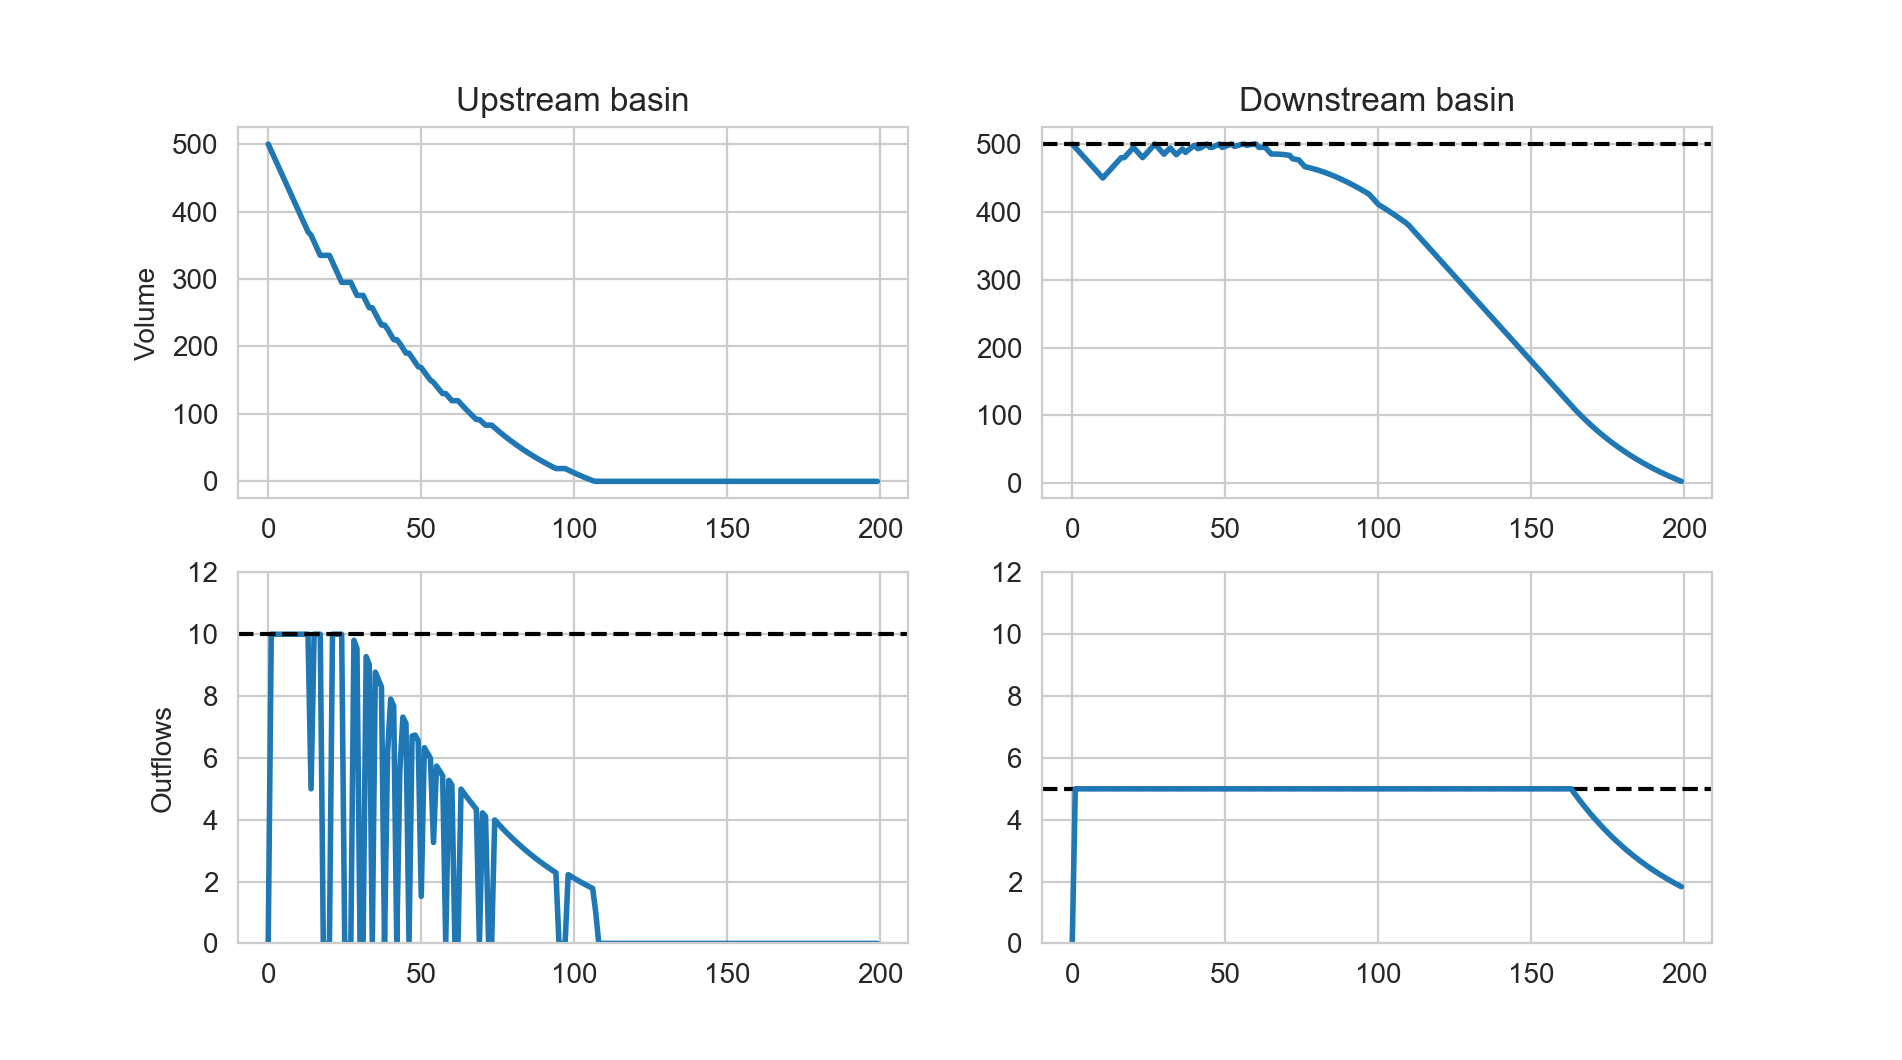

(0, 12)

In [18]:
# Create a model 
m = Model("twoponds_timeoftravel")

# Create intial volume 
InitialVolume = 500
# Basins beign controlled 
basins = [0, 1]

# Time horizon for solving
horizon = [i for i in range(0,200)]

# Create volumes for each basin 
volumes = m.addVars(horizon, basins, ub=500, name="volume")

# Create Valves for each basin 
outflows = m.addVars(horizon, basins, name="outflows")


# Create Constraints 
## 1. Max volume capacity constraint already enforced

## 2. Flow limit in channels 
m.addConstrs((outflows[time, 0] <= 10 for time in horizon), name="Upstream Channel")
m.addConstrs((outflows[time, 1] <= 5 for time in horizon), name="Downstream Channel")

## 3. Flow limit based on the volume in the ponds
m.addConstrs((outflows[time, 0] <= (volumes[time-1, 0]*6.14647148e-02 + 3.81)*0.447 for time in horizon[1:]), name="Upstream Pond")
m.addConstrs((outflows[time, 1] <= (volumes[time-1, 1]*6.14647148e-02 + 3.81)*0.447 for time in horizon[1:]), name="Downstream Pond")

## 4. Add some initial volume 
m.addConstr(volumes[0, 0] == InitialVolume, "Initial Volume Pond 1")
m.addConstr(volumes[0, 1] == InitialVolume, "Initial Volume Pond 2")

## 5. Volume constraints 
m.addConstrs((volumes[time, 0]  == volumes[time-1, 0] - outflows[time, 0] for time in horizon[1:]), name="Mass Balance pond:0")
m.addConstrs(((volumes[time, 1]  == volumes[time-1, 1] - outflows[time, 1] if time <=10 else volumes[time, 1]  == volumes[time-1, 1] - outflows[time, 1] + outflows[time-3, 0]) for time in horizon[1:]), name="Mass Balance pond:1")

## 5. Minimize the water in the network ponds
m.setObjective(volumes.sum(), GRB.MINIMIZE)
m.optimize()

# Parse using regex 
data = {}
data["volume_0"] = []
data["volume_1"] = []

data["outflows_0"] = []
data["outflows_1"] = []

for v in m.getVars():
    temp = re.split('\[|,|\]', v.varName)
    data[temp[0] + "_" + temp[2]].append(v.x)

plt.subplot(2,2,1)
plt.plot(data["volume_0"], linewidth=2.0)
plt.ylabel("Volume")
plt.title("Upstream basin")

plt.subplot(2,2,3)
plt.plot(data["outflows_0"], linewidth=2.0)
plt.axhline(y=10, color='k', linestyle='--')
plt.ylim([0, 12])
plt.ylabel("Outflows")

plt.subplot(2,2,2)
plt.plot(data["volume_1"], linewidth=2.0)
plt.axhline(y=500, color='k', linestyle='--')
plt.title("Downstream basin")

plt.subplot(2,2,4)
plt.axhline(y=5, color='k', linestyle='--')
plt.plot(data["outflows_1"], linewidth=2.0)
plt.ylim([0, 12])

# Three Ponds with Horizon

![3ponds](./threeponds.png)

Optimize a model with 4497 rows, 3000 columns and 9966 nonzeros
Coefficient statistics:
  Matrix range     [3e-02, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+03, 1e+03]
  RHS range        [2e+00, 1e+03]
Presolve removed 2530 rows and 791 columns
Presolve time: 0.01s
Presolved: 1967 rows, 2209 columns, 7123 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.8364364e+04   6.623182e+02   0.000000e+00      0s
    2247    4.9534649e+05   0.000000e+00   0.000000e+00      0s

Solved in 2247 iterations and 0.14 seconds
Optimal objective  4.953464907e+05


<IPython.core.display.Javascript object>


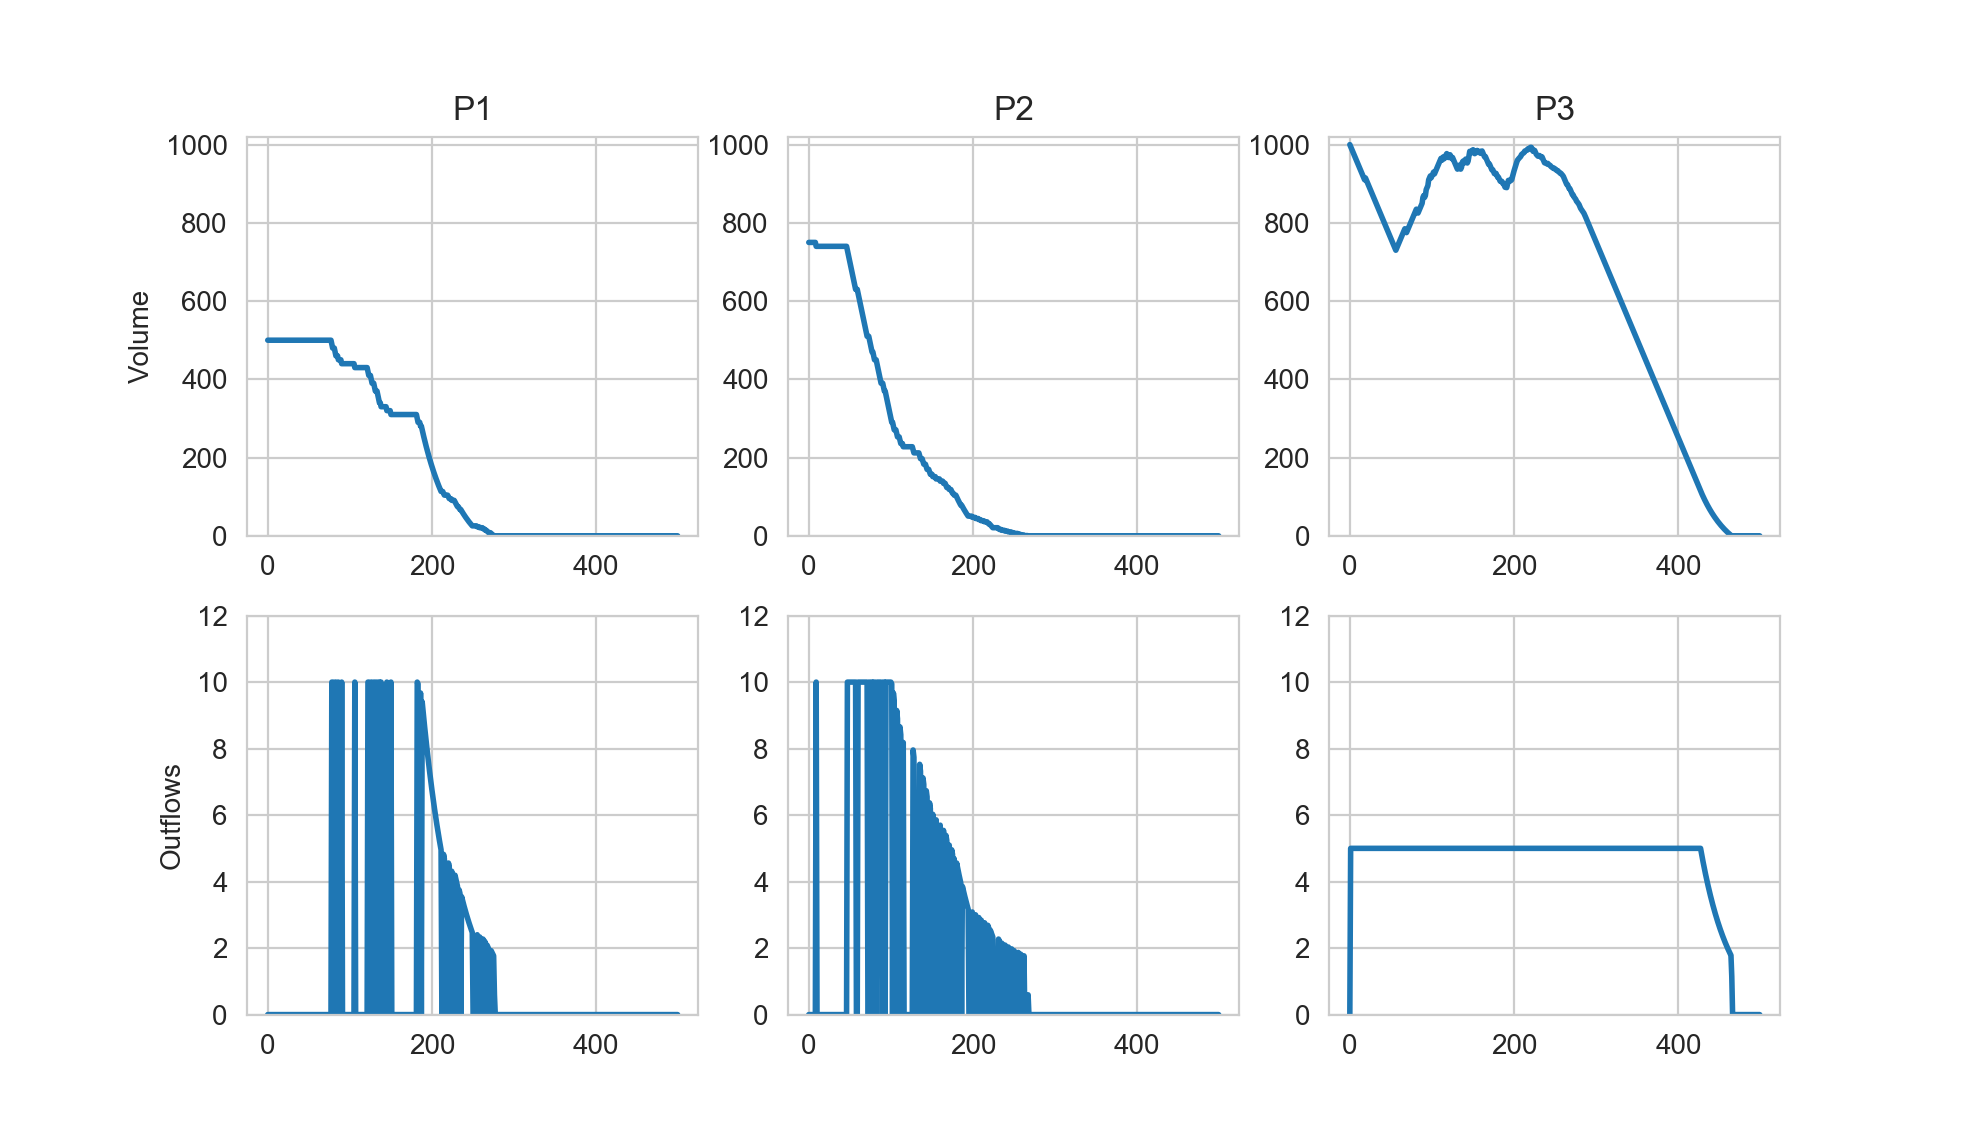

(0, 12)

In [21]:
# Create a model 
m = Model("threeponds_timeoftravel")

# Create intial volume 
InitialVolume = 1000
# Basins beign controlled 
basins = [0, 1, 2]

# Time horizon for solving
horizon = [i for i in range(0,500)]

# Create volumes for each basin 
volumes = m.addVars(horizon, basins, ub=1000, name="volume")

# Create Valves for each basin 
outflows = m.addVars(horizon, basins, name="outflows")


# Create Constraints 
## 1. Max volume capacity constraint already enforced

## 2. Flow limit in channels 
m.addConstrs((outflows[time, 0] <= 10 for time in horizon), name="Upstream Channel1")
m.addConstrs((outflows[time, 1] <= 10 for time in horizon), name="Upstream Channel2")
m.addConstrs((outflows[time, 2] <= 5 for time in horizon), name="Downstream Channel")

## 3. Flow limit based on the volume in the ponds
m.addConstrs((outflows[time, 0] <= (volumes[time-1, 0]*6.14647148e-02 + 3.81)*0.447 for time in horizon[1:]), name="Upstream Pond1")
m.addConstrs((outflows[time, 1] <= (volumes[time-1, 1]*6.14647148e-02 + 3.81)*0.447 for time in horizon[1:]), name="Upstream Pond2")
m.addConstrs((outflows[time, 2] <= (volumes[time-1, 2]*6.14647148e-02 + 3.81)*0.447 for time in horizon[1:]), name="Downstream Pond")

## 4. Add some initial volume 
m.addConstr(volumes[0, 0] == 0.50 *  InitialVolume, "Initial Volume Pond 1")
m.addConstr(volumes[0, 1] == 0.75 * InitialVolume, "Initial Volume Pond 2")
m.addConstr(volumes[0, 2] == InitialVolume, "Initial Volume Pond 3")

## 5. Volume constraints 
m.addConstrs((volumes[time, 0]  == volumes[time-1, 0] - outflows[time, 0] for time in horizon[1:]), name="Mass Balance pond:1")
m.addConstrs((volumes[time, 1]  == volumes[time-1, 1] - outflows[time, 1] for time in horizon[1:]), name="Mass Balance pond:2")
m.addConstrs(((volumes[time, 2]  == volumes[time-1, 2] - outflows[time, 2] if time <=10 else volumes[time, 2]  == volumes[time-1, 2] - outflows[time, 2] + outflows[time-10, 0] + outflows[time-10, 1]) for time in horizon[1:]), name="Mass Balance pond:3")

## 5. Minimize the water in the network ponds
m.setObjective(volumes.sum(), GRB.MINIMIZE)
m.optimize()

# Parse using regex 
data = {}
data["volume_0"] = []
data["volume_1"] = []
data["volume_2"] = []

data["outflows_0"] = []
data["outflows_1"] = []
data["outflows_2"] = []

for v in m.getVars():
    temp = re.split('\[|,|\]', v.varName)
    data[temp[0] + "_" + temp[2]].append(v.x)

plt.subplot(2,3,1)
plt.plot(data["volume_0"], linewidth=2.0)
plt.ylabel("Volume")
plt.ylim([0, 1020])
plt.title("P1")

plt.subplot(2,3,2)
plt.plot(data["volume_1"], linewidth=2.0)
plt.ylim([0, 1020])
plt.title("P2")

plt.subplot(2,3,3)
plt.plot(data["volume_2"], linewidth=2.0)
plt.ylim([0, 1020])
plt.title("P3")

plt.subplot(2,3,4)
plt.plot(data["outflows_0"], linewidth=2.0)
plt.ylim([0, 12])
plt.ylabel("Outflows")

plt.subplot(2,3,5)
plt.plot(data["outflows_1"], linewidth=2.0)
plt.ylim([0, 12])

plt.subplot(2,3,6)
plt.plot(data["outflows_2"], linewidth=2.0)
plt.ylim([0, 12])